# Week 2: Interpretable Models
Author: Van Bach Nguyen, licensed under the Creative Commons Attribution 3.0 Unported License https://creativecommons.org/licenses/by/3.0/  

# Table of contents
- [Exercise 1: Decision Tree (ID3)](#Ex1)  
- [Exercise 2: Surrogate model](#Ex2)  
- [Exercise 3: Trepan](#Ex2)  

# Exercise 1: Decision Tree <a name="Ex1"></a>


In this exercise, implement the ID3 algorithm from slide 26 of the lecture slides. Add comments corresponding to each step before the line of code executing that step (Step 1, 2 is enough). You can introduce additional functions, but do not change the existing ones.

In [1]:
#Your implementation
#Step 1
def ID3(D,A):
    """
    Dataset D, Attributes A

    Result: Decision tree
    """
    
#Your implementation

Given the dataset:

In [676]:
import pandas as pd
toy_dataset = pd.read_csv("dataset/toy.csv")
toy_dataset.head()

Age  Income Previous Purchase Buy Product
0   Young    High                No          No
1   Young     Low               Yes         Yes
2   Young  Medium               Yes         Yes
3  Middle    High                No         Yes
4  Middle  Medium                No          No

**Task:** Apply the ID3 algorithm that you implemented to the provided tiny dataset and print the results in the form of a decision tree or a list of rules.

In [ ]:
#executing the line of code below should print the decision tree
ID3(toy_dataset, toy_dataset.columns)

**Task**: Verify your decision tree using the scikit-learn library.

In [ ]:
#Your code


# Exercise 2: Surrogate models <a name="Ex2"></a>

In this exercise, we will practice the idea of the surrogate model - trepan by implementing the student-teacher model approach. For this current exercise, we don't need to implement the algorithm exactly, but just the key idea of it.

**Task:**
- Apply the key idea from lecture slide 30; the black model is already given in the folder.
- Build an interpretable model by using the blackbox model as an oracle (by generating training data).
  - Calculate fidelity and accuracy.
  - Interpret the results.
- Compare your interpretable model built on the original dataset without an oracle. What is your conclusion?


Run the code below is to load the black_box model and check its performance on MNIST dataset

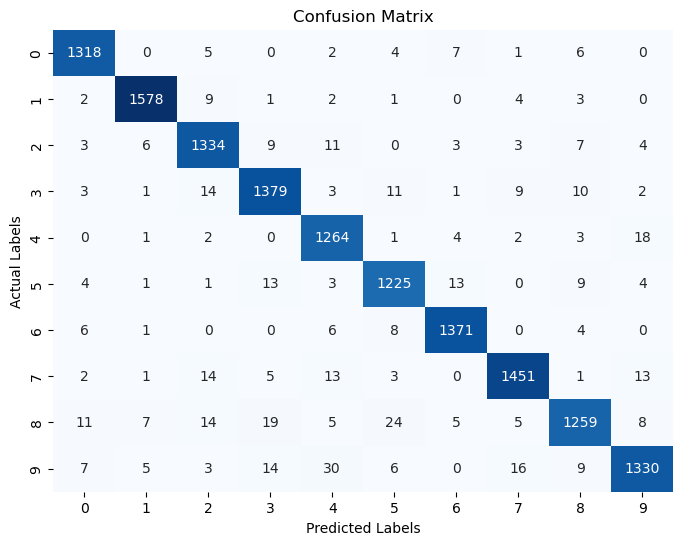

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1343
           1       0.99      0.99      0.99      1600
           2       0.96      0.97      0.96      1380
           3       0.96      0.96      0.96      1433
           4       0.94      0.98      0.96      1295
           5       0.95      0.96      0.96      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.93      0.94      1357
           9       0.96      0.94      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



In [677]:
# Import necessary libraries
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pickle

# Load the MNIST dataset from scikit-learn (or you can download it from other sources)
mnist = fetch_openml('mnist_784', parser='auto')
X = mnist.data
y = mnist.target

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Load model
file = open('model/bb.pkl', 'rb')
black_box = pickle.load(file)
y_pred = black_box.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)

# Create a classification report
class_report = classification_report(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", class_report)


**Comment:** Pretty high accuracy

In [ ]:
#your implementation

# Exercise 3: Trepan <a name="Ex3"></a>
Implement Trepan algorithm in the original paper and apply it to exercise 2 by replacing the student model with Trepan.  
The algorithm is available [here](https://proceedings.neurips.cc/paper/1995/file/45f31d16b1058d586fc3be7207b58053-Paper.pdf) in Table 1